<h1 style="background-color: #007BFF; color: white; padding: 20px; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); text-align: center; display: inline-block; margin: 0 auto; text-align: center;">
    COVID-19 Global Data Analysis
</h1>


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


<p style="text-align: left; margin-left: 20px; font-size: 18px; color: #007BFF;">
    <a href="#" style="text-decoration: none; color: #007BFF;">Load Data</a>
</p>

In [2]:
data=pd.read_csv('/kaggle/input/corona-virus-report/country_wise_latest.csv')


<p style="text-align: left; margin-left: 20px; font-size: 18px; color: #007BFF;">
    <a href="#" style="text-decoration: none; color: #007BFF;">View Data</a>
</p>

In [3]:
data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [4]:
data.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


<h3 style="text-align: left; color: white; padding: 20px;">
    COVID-19 Data Analysis - Key Observations
</h3>

<h3 style="color: white; padding: 10px;">Observations on Skewness, Mean, Max, and Standard Deviation</h3>

<p style="color: white; padding: 10px;">The following observations are made from the summary statistics of the COVID-19 dataset:</p>

<h3 style="color: white; padding: 10px;">Skewness</h3>
<p style="color: white; padding: 10px;">The dataset shows a highly skewed distribution, particularly for some columns like "Confirmed" and "Deaths." This is reflected by the wide range between the minimum and maximum values, with a few countries having extremely high values compared to others. Skewness often indicates that a smaller number of entries (countries or regions) contribute disproportionately to the total count of cases and deaths.</p>

<h3 style="color: white; padding: 10px;">Mean</h3>
<p style="color: white; padding: 10px;">The mean confirmed cases are 88,130, with a mean number of deaths around 3,497. These averages are influenced by a few countries with extremely high case and death numbers. The mean recovery count stands at 50,631, reflecting the overall global progress in managing the pandemic, although some regions are still struggling with high numbers of active cases.</p>

<h3 style="color: white; padding: 10px;">Max</h3>
<p style="color: white; padding: 10px;">The maximum values for "Confirmed" and "Deaths" are particularly high, with the highest number of confirmed cases reaching over 4.29 million and the highest number of deaths being 148,011. These outliers suggest that certain regions have been severely impacted by the pandemic, which is likely due to factors like population density, healthcare infrastructure, and government responses.</p>

<h3 style="color: white; padding: 10px;">Standard Deviation (Std)</h3>
<p style="color: white; padding: 10px;">The standard deviation for the "Confirmed" column is 383,318, showing a significant variation in the number of confirmed cases across different regions. The standard deviation for "Deaths" is also large at 14,100, indicating that the number of deaths varies significantly. A large standard deviation suggests that the dataset contains both very small and very large values, which is typical in global data with significant regional differences.</p>


In [5]:
data.shape

(187, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [7]:
data.dtypes

Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

In [8]:
data.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

<h4 style="color: blue; padding: 10px;">EDA</h4>


In [9]:
data['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [10]:
data['WHO Region'].nunique() 

6

In [11]:
data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [12]:
data['Country/Region'].nunique()

187

In [13]:
data.set_index('Country/Region',inplace=True)

In [14]:
data.isna().sum()

Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [15]:
data.duplicated().sum()

0

In [16]:
(data==np.inf).sum()

Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    5
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [17]:
(data==-np.inf).sum()

Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

<h4 style="color: blue; padding: 10px;">Cleaning Data</h4> 

In [18]:
data.replace([np.inf,-np.inf],np.nan,inplace=True)

In [19]:
data['Deaths / 100 Recovered'].fillna(data['Deaths / 100 Recovered'].mean())

Country/Region
Afghanistan            5.04
Albania                5.25
Algeria                6.17
Andorra                6.48
Angola                16.94
                      ...  
West Bank and Gaza     2.08
Western Sahara        12.50
Yemen                 57.98
Zambia                 4.97
Zimbabwe               6.64
Name: Deaths / 100 Recovered, Length: 187, dtype: float64

In [20]:
(data==np.inf).sum()

Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

<h4 style="color: blue; padding: 10px;">Visualization</h4>


array([[<Axes: title={'center': 'Confirmed'}>,
        <Axes: title={'center': 'Deaths'}>,
        <Axes: title={'center': 'Recovered'}>,
        <Axes: title={'center': 'Active'}>],
       [<Axes: title={'center': 'New cases'}>,
        <Axes: title={'center': 'New deaths'}>,
        <Axes: title={'center': 'New recovered'}>,
        <Axes: title={'center': 'Deaths / 100 Cases'}>],
       [<Axes: title={'center': 'Recovered / 100 Cases'}>,
        <Axes: title={'center': 'Deaths / 100 Recovered'}>,
        <Axes: title={'center': 'Confirmed last week'}>,
        <Axes: title={'center': '1 week change'}>],
       [<Axes: title={'center': '1 week % increase'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

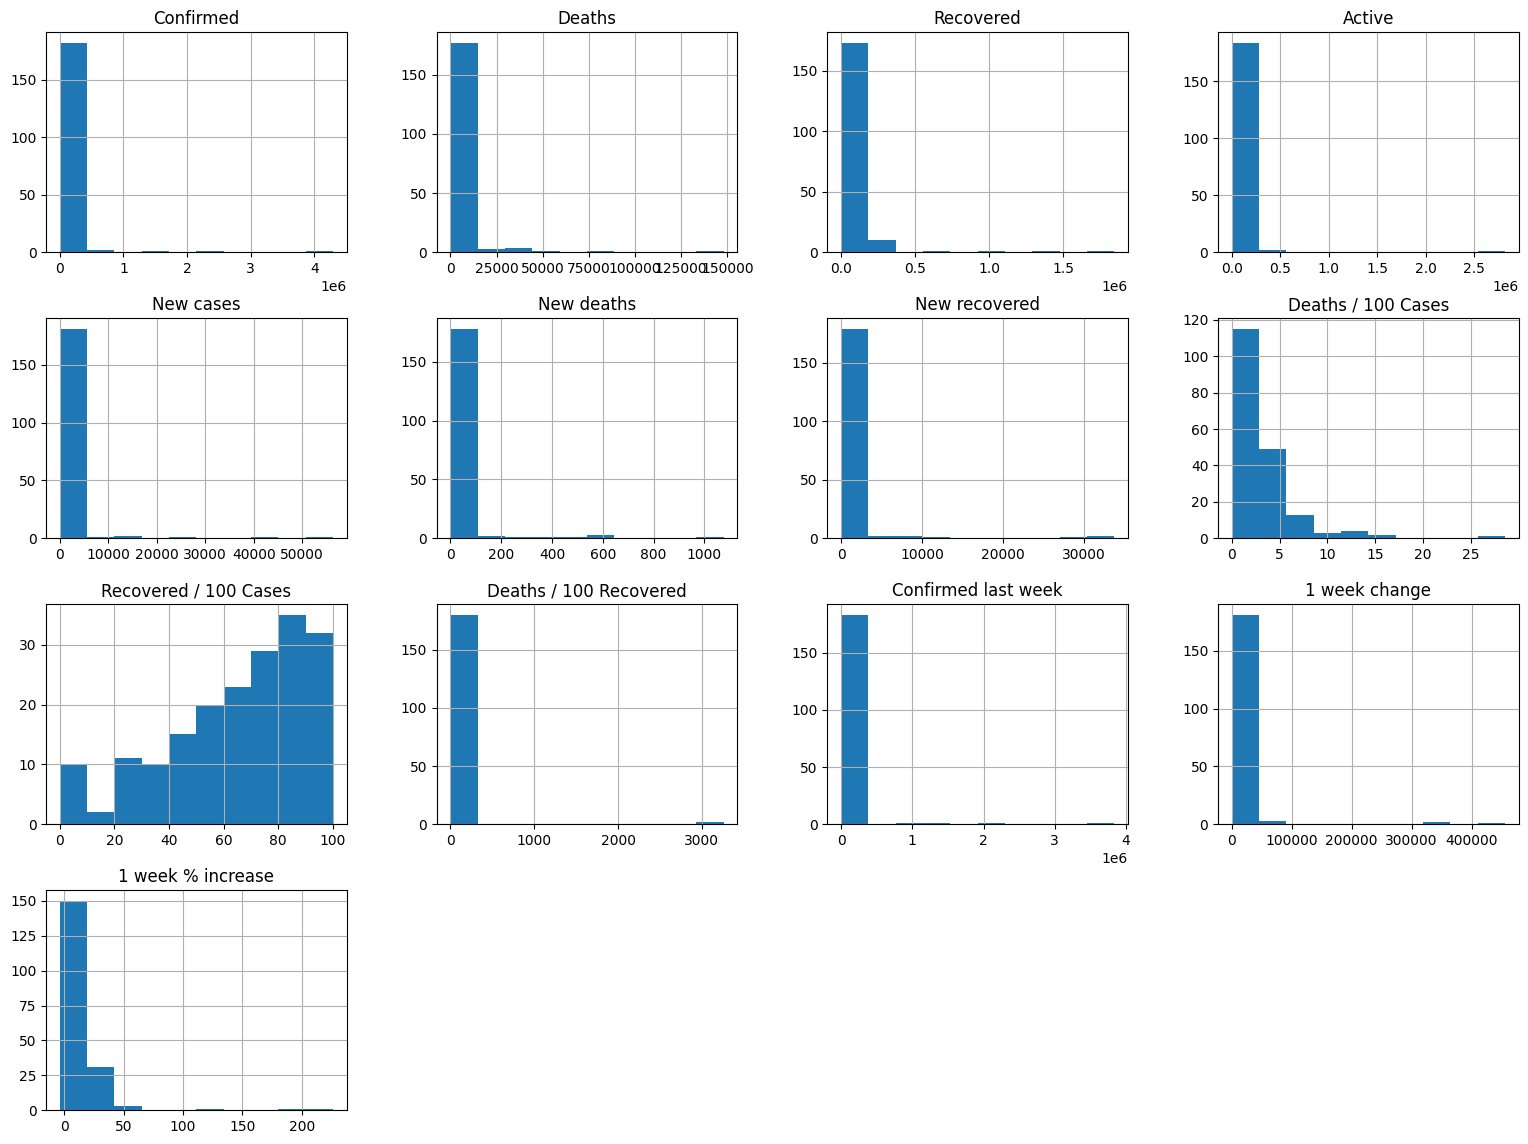

In [21]:
data.hist(figsize=(19,14),bins=10)

Text(0.5, 1.0, 'Correlation Matrix')

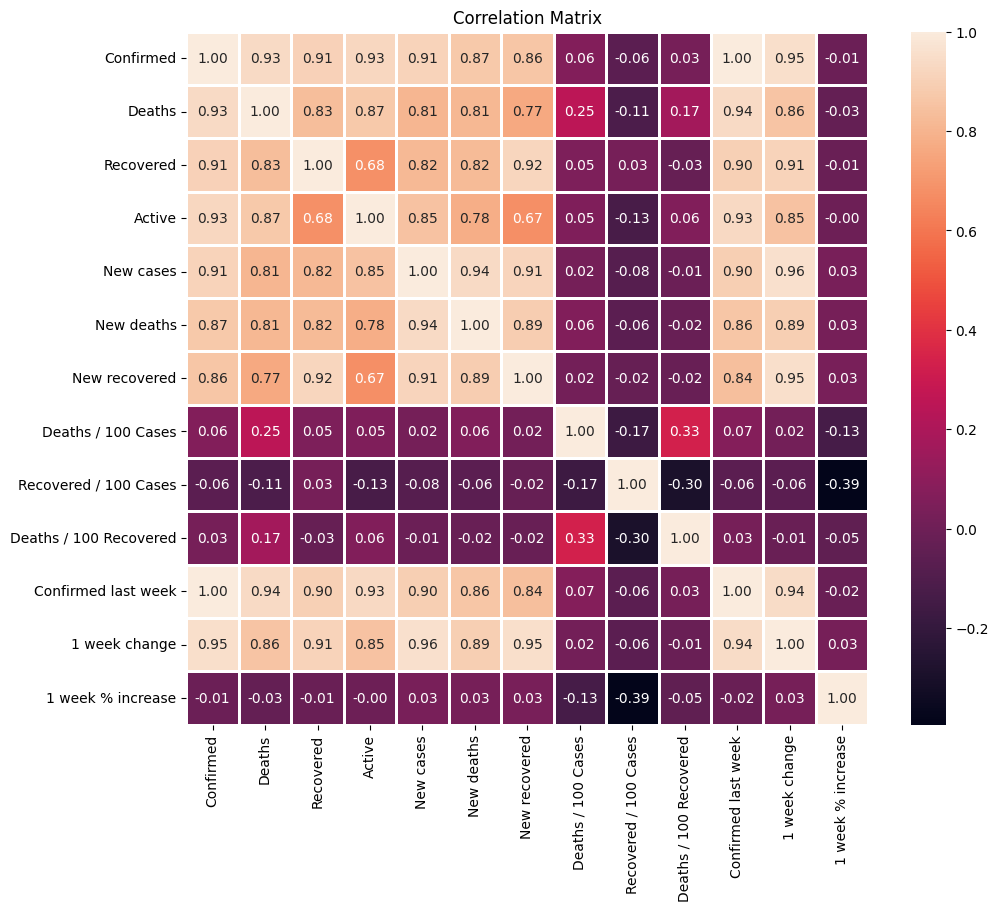

In [22]:
plt.figure(figsize=(11,9))
dats=data.select_dtypes(include='number')
sns.heatmap(dats.corr(),annot=True,fmt='.2f',linewidth=2)
plt.title('Correlation Matrix')

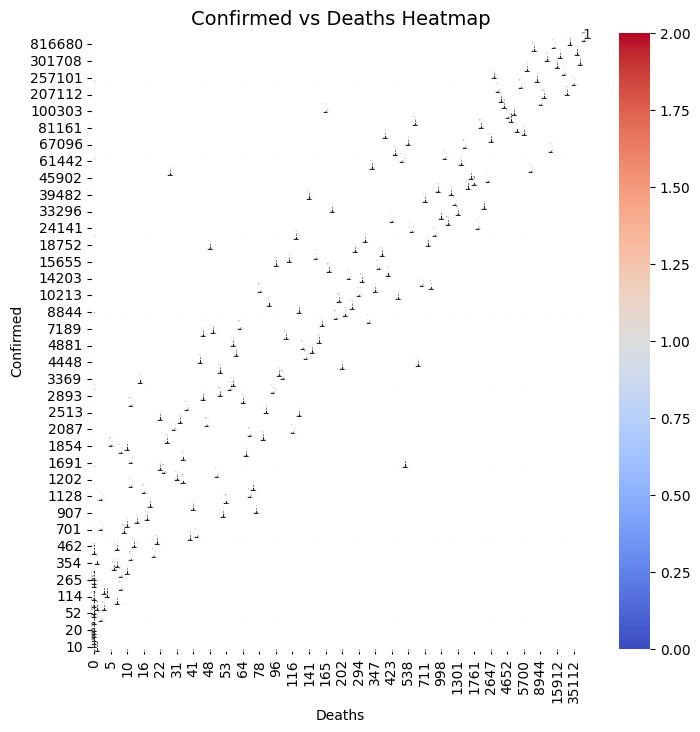

In [23]:
plt.figure(figsize=(8, 8))
d = pd.crosstab(data['Confirmed'], data['Deaths'])

sns.heatmap(d, annot=True, cmap='coolwarm', linewidths=1, vmin=d.values.min(), vmax=d.values.max())

plt.gca().invert_yaxis()
plt.title('Confirmed vs Deaths Heatmap', fontsize=14)
plt.show()
